# Análisis de Ventas de Autos en Argentina (2019-2024)

Este Jupyter Notebook analiza las ventas de autos en Argentina entre 2019 y 2024. Se incluyen análisis de:
- Ventas totales por año.
- Marcas más vendidas por año.
- Análisis de edad de los titulares por género.
- Recuento de automotores por origen.

## Requisitos
Para ejecutar este notebook, necesitas instalar las siguientes bibliotecas:
```bash
pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta al archivo local (ajusta según donde lo guardaste)
file_path = 'C:/Users/alexu/OneDrive/Escritorio/Analisis-Matriculacion-Vehiculos-Argentina/inscripciones-autos-total.csv'

# Paso 1: Verificar columnas
print("Cargando primeras 1000 filas para verificar columnas...")
try:
    df_preview = pd.read_csv(file_path, nrows=1000, low_memory=False)
except UnicodeDecodeError:
    print("Error de codificación. Intentando con 'latin1'...")
    df_preview = pd.read_csv(file_path, nrows=1000, encoding='latin1', low_memory=False)
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    exit()

# Mostrar columnas
columns = df_preview.columns.tolist()
print("\nColumnas disponibles (originales):", columns)
print("Columnas disponibles (en minúsculas):", [col.lower() for col in columns])

# Verificar 'fecha_inscripcion_inicial'
target_column = 'fecha_inscripcion_inicial'
if target_column in columns or target_column.lower() in [col.lower() for col in columns]:
    print(f"\nColumna '{target_column}' encontrada.")
    print(f"Muestra de '{target_column}':")
    print(df_preview[target_column].head())
else:
    print(f"\nColumna '{target_column}' NO encontrada.")
    similar_columns = [col for col in columns if any(x in col.lower() for x in ['fecha', 'inscripcion', 'registro', 'date'])]
    print("Columnas similares con 'fecha', 'inscripcion', 'registro' o 'date':", 
          similar_columns if similar_columns else "Ninguna encontrada")
    print("Por favor, verifica el archivo descargado.")
    exit()

# Paso 2: Cargar el archivo en fragmentos
chunk_size = 100000
print(f"\nCargando archivo en fragmentos de {chunk_size} filas...")
try:
    chunks = pd.read_csv(
        file_path,
        chunksize=chunk_size,
        low_memory=False,
        encoding='latin1' if 'latin1' in locals() else None
    )
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    exit()

df_list = []
for chunk in chunks:
    chunk['fecha_inscripcion_inicial'] = pd.to_datetime(
        chunk['fecha_inscripcion_inicial'], format='%Y-%m-%d', errors='coerce'
    )
    chunk['Año'] = chunk['fecha_inscripcion_inicial'].dt.year
    df_list.append(chunk)

# Combinar fragmentos
df = pd.concat(df_list, ignore_index=True)
print("\nArchivo cargado exitosamente.")

# Paso 3: Verificar años disponibles
print("Años disponibles:", df['Año'].unique())

Cargando primeras 1000 filas para verificar columnas...

Columnas disponibles (originales): ['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial', 'registro_seccional_provincia', 'automotor_origen', 'automotor_anio_modelo', 'automotor_tipo_descripcion', 'automotor_marca_descripcion', 'automotor_modelo_descripcion', 'automotor_uso_descripcion', 'titular_tipo_persona', 'titular_domicilio_provincia', 'titular_genero', 'titular_anio_nacimiento']
Columnas disponibles (en minúsculas): ['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial', 'registro_seccional_provincia', 'automotor_origen', 'automotor_anio_modelo', 'automotor_tipo_descripcion', 'automotor_marca_descripcion', 'automotor_modelo_descripcion', 'automotor_uso_descripcion', 'titular_tipo_persona', 'titular_domicilio_provincia', 'titular_genero', 'titular_anio_nacimiento']

Columna 'fecha_inscripcion_inicial' encontrada.
Muestra de 'fecha_inscripcion_inicial':
0    2019-01-29
1    2019-01-07
2    2019-01-11
3    2019


Total de autos vendidos por año:
 Año  Total_Autos
2019       461031
2020       343608
2021       383734
2022       409905
2023       451270
2024       416298


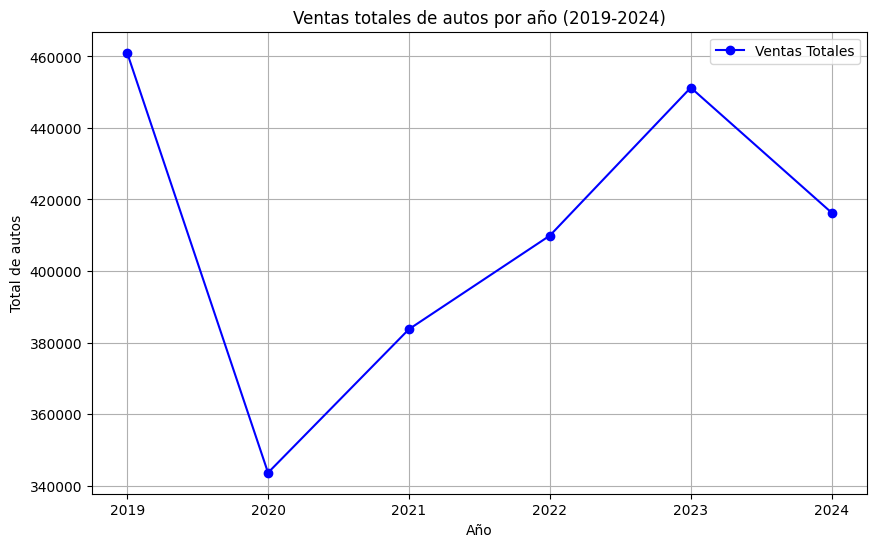

In [4]:
# --- Ventas totales por año ---
# Calcular ventas totales por año
ventas_por_año = df.groupby('Año').size().reset_index(name='Total_Autos')
print("\nTotal de autos vendidos por año:")
print(ventas_por_año.to_string(index=False))

# Gráfico de ventas totales por año (líneas)
plt.figure(figsize=(10, 6))
plt.plot(ventas_por_año['Año'], ventas_por_año['Total_Autos'], marker='o', color='blue', label='Ventas Totales')
plt.xlabel('Año')
plt.ylabel('Total de autos')
plt.title('Ventas totales de autos por año (2019-2024)')
plt.legend()
plt.grid(True)
plt.show()


Marcas más vendidas por cada año (Top 10):

Año 2019:
automotor_marca_descripcion  Total_Ventas
                 VOLKSWAGEN         69673
                     TOYOTA         65079
                    RENAULT         63269
                       FORD         51441
                  CHEVROLET         51123
                       FIAT         42318
                    PEUGEOT         29129
                     NISSAN         16521
                    CITROEN         14799
                       JEEP         10897

Año 2020:
automotor_marca_descripcion  Total_Ventas
                 VOLKSWAGEN         57154
                     TOYOTA         43663
                    RENAULT         42797
                       FIAT         37699
                  CHEVROLET         35342
                       FORD         32489
                    PEUGEOT         21984
                     NISSAN         12499
                    CITROEN         11520
                       JEEP          9834

Año 2021:

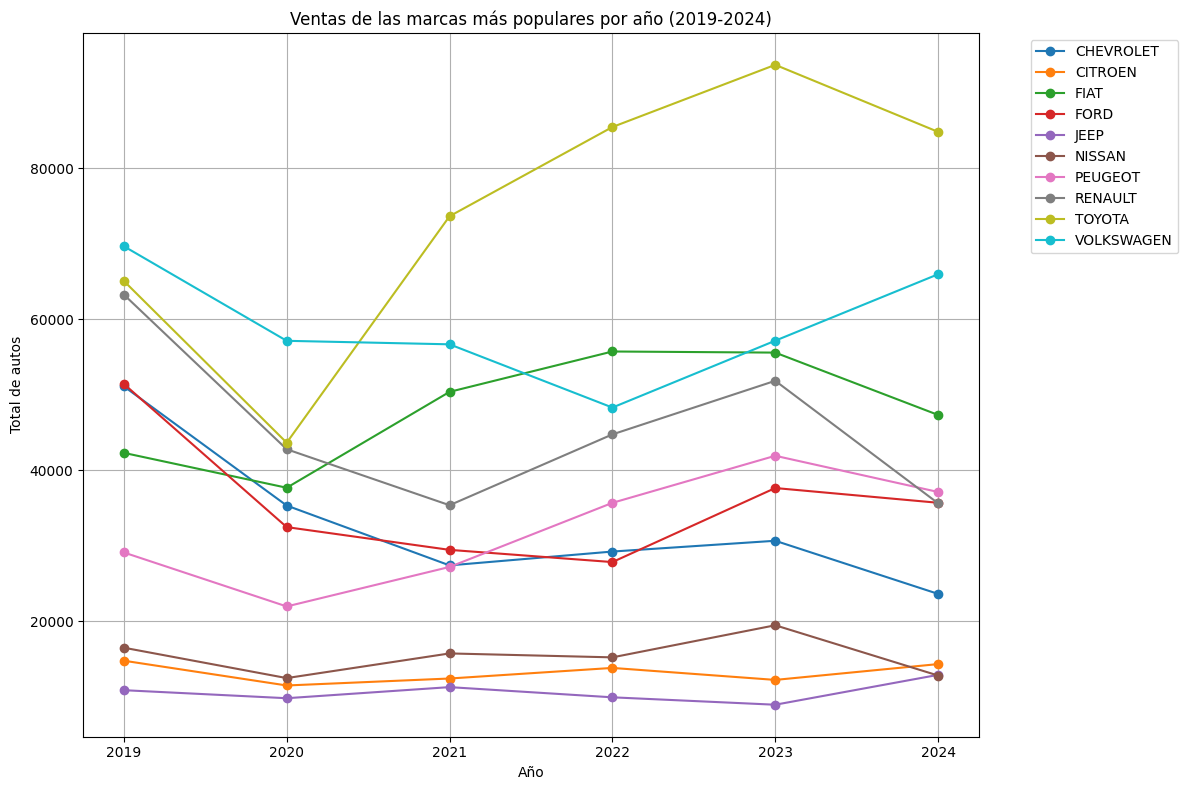

In [5]:
# --- Marcas más vendidas por año ---
# Identificar las marcas más populares en general (para usarlas en el gráfico)
ventas_por_marca_total = df.groupby('automotor_marca_descripcion').size().reset_index(name='Total_Ventas')
top_marcas_global = ventas_por_marca_total.sort_values(by='Total_Ventas', ascending=False).head(10)['automotor_marca_descripcion'].tolist()

# Calcular las marcas más vendidas por cada año (para la tabla)
print("\nMarcas más vendidas por cada año (Top 10):")
for year in sorted(df['Año'].unique()):
    df_year = df[df['Año'] == year]
    ventas_por_marca_year = df_year.groupby('automotor_marca_descripcion').size().reset_index(name='Total_Ventas')
    top_marcas_year = ventas_por_marca_year.sort_values(by='Total_Ventas', ascending=False).head(10)
    print(f"\nAño {year}:")
    print(top_marcas_year.to_string(index=False))

# Preparar datos para el gráfico de marcas (solo las top 10 globales)
ventas_marcas_por_año = df[df['automotor_marca_descripcion'].isin(top_marcas_global)].groupby(['Año', 'automotor_marca_descripcion']).size().unstack(fill_value=0)

# Gráfico de líneas múltiples para las marcas más vendidas
plt.figure(figsize=(12, 8))
for marca in ventas_marcas_por_año.columns:
    plt.plot(ventas_marcas_por_año.index, ventas_marcas_por_año[marca], marker='o', label=marca)
plt.xlabel('Año')
plt.ylabel('Total de autos')
plt.title('Ventas de las marcas más populares por año (2019-2024)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Análisis de edad de los titulares por año y género:

Año 2019:
titular_genero  Edad_Promedio  Edad_Mediana  Edad_Mínima  Edad_Máxima  Cantidad
      Femenino      47.820173          47.0         18.0         97.0    143171
     Masculino      49.974899          50.0         18.0         99.0    235293

Año 2020:
titular_genero  Edad_Promedio  Edad_Mediana  Edad_Mínima  Edad_Máxima  Cantidad
      Femenino      47.784775          47.0         18.0         99.0    105694
     Masculino      49.824788          50.0         18.0         97.0    175365

Año 2021:
titular_genero  Edad_Promedio  Edad_Mediana  Edad_Mínima  Edad_Máxima  Cantidad
      Femenino      47.636750          47.0         18.0         98.0    105393
     Masculino      49.568153          49.0         18.0         99.0    187562

Año 2022:
titular_genero  Edad_Promedio  Edad_Mediana  Edad_Mínima  Edad_Máxima  Cantidad
      Femenino      47.433055          47.0         18.0         99.0    109187
     Masculino      49.

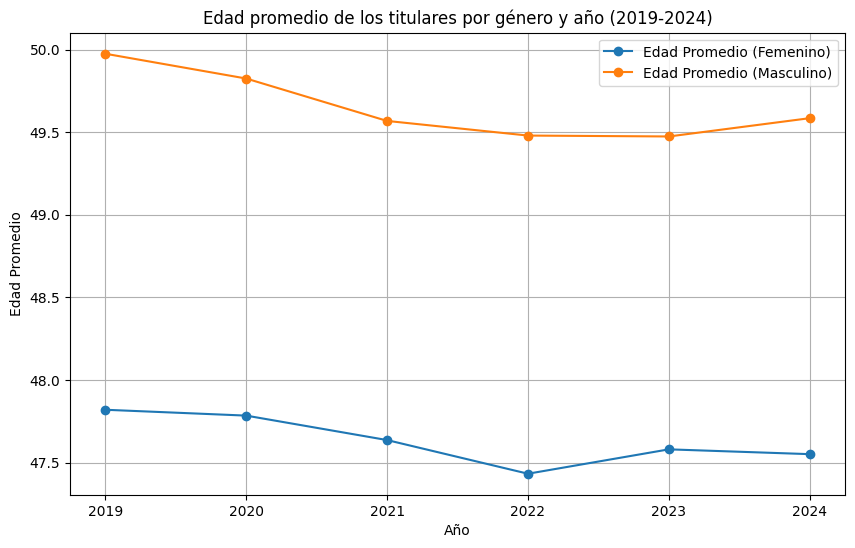

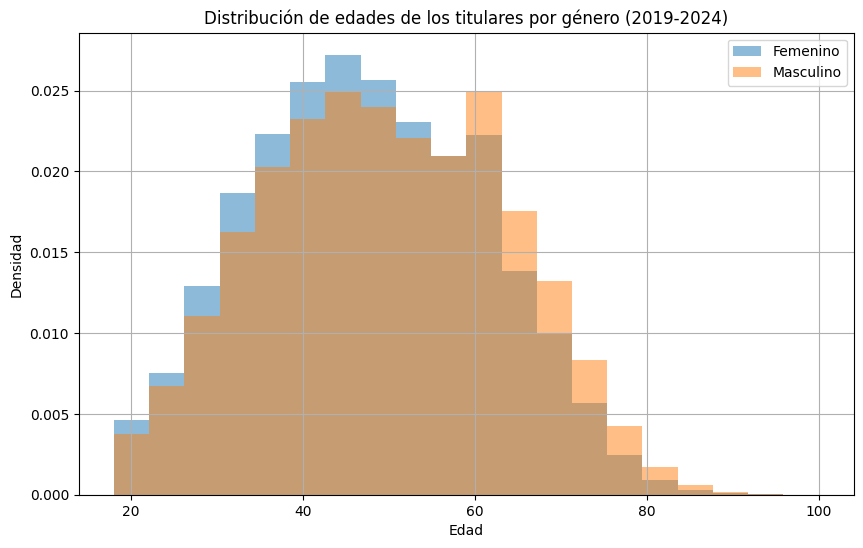

<Figure size 1000x600 with 0 Axes>

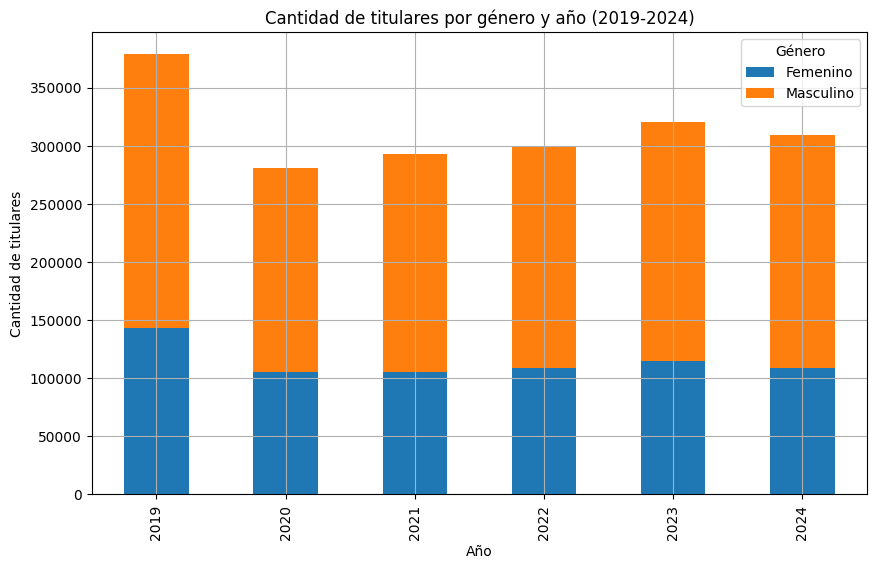

In [6]:
# --- Análisis de edad de los titulares por género ---
# Filtrar registros con año de nacimiento y género válidos
df_edad = df.dropna(subset=['titular_anio_nacimiento', 'titular_genero'])
df_edad = df_edad[df_edad['titular_genero'].str.strip() != '']

# Excluir registros con texto "NO APLICA" o "NO IDENTIFICADO"
df_edad = df_edad[~df_edad['titular_genero'].str.upper().isin(['NO APLICA', 'NO IDENTIFICADO'])]

# Convertir titular_anio_nacimiento a numérico
df_edad['titular_anio_nacimiento'] = pd.to_numeric(df_edad['titular_anio_nacimiento'], errors='coerce')
df_edad = df_edad.dropna(subset=['titular_anio_nacimiento'])

# Calcular la edad
df_edad['Edad'] = df_edad['Año'] - df_edad['titular_anio_nacimiento']

# Filtrar edades razonables
df_edad = df_edad[(df_edad['Edad'] >= 18) & (df_edad['Edad'] <= 100)]

# Agrupar por año y género
edad_por_año_genero = df_edad.groupby(['Año', 'titular_genero'])['Edad'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()
edad_por_año_genero = edad_por_año_genero.rename(columns={
    'mean': 'Edad_Promedio',
    'median': 'Edad_Mediana',
    'min': 'Edad_Mínima',
    'max': 'Edad_Máxima',
    'count': 'Cantidad'
})

# Mostrar tabla de análisis de edad
print("\nAnálisis de edad de los titulares por año y género:")
for year in sorted(edad_por_año_genero['Año'].unique()):
    print(f"\nAño {year}:")
    df_year = edad_por_año_genero[edad_por_año_genero['Año'] == year]
    print(df_year[['titular_genero', 'Edad_Promedio', 'Edad_Mediana', 'Edad_Mínima', 'Edad_Máxima', 'Cantidad']].to_string(index=False))

# Gráfico 1: Edad promedio por género y año (líneas múltiples)
plt.figure(figsize=(10, 6))
for genero in edad_por_año_genero['titular_genero'].unique():
    df_genero = edad_por_año_genero[edad_por_año_genero['titular_genero'] == genero]
    plt.plot(df_genero['Año'], df_genero['Edad_Promedio'], marker='o', label=f'Edad Promedio ({genero})')
plt.xlabel('Año')
plt.ylabel('Edad Promedio')
plt.title('Edad promedio de los titulares por género y año (2019-2024)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico 2: Distribución de edades por género (histograma)
plt.figure(figsize=(10, 6))
for genero in df_edad['titular_genero'].unique():
    plt.hist(df_edad[df_edad['titular_genero'] == genero]['Edad'], bins=20, alpha=0.5, label=genero, density=True)
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Distribución de edades de los titulares por género (2019-2024)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico 3: Cantidad de titulares por género y año (barras apiladas)
cantidad_por_año_genero = df_edad.groupby(['Año', 'titular_genero']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
cantidad_por_año_genero.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Cantidad de titulares')
plt.title('Cantidad de titulares por género y año (2019-2024)')
plt.legend(title='Género')
plt.grid(True)
plt.show()


Recuento de automotores por origen y año:
automotor_origen  Importado  Nacional  Protocolo 21
Año                                                
2019                  56603    137993        266435
2020                  31321    120699        191588
2021                  35127    192780        155827
2022                  33170    236416        140319
2023                  30771    299490        121009
2024                  36390    227317        152591

Total de automotores por año (desglosado por origen):
Año
2019    461031
2020    343608
2021    383734
2022    409905
2023    451270
2024    416298
dtype: int64


<Figure size 1000x600 with 0 Axes>

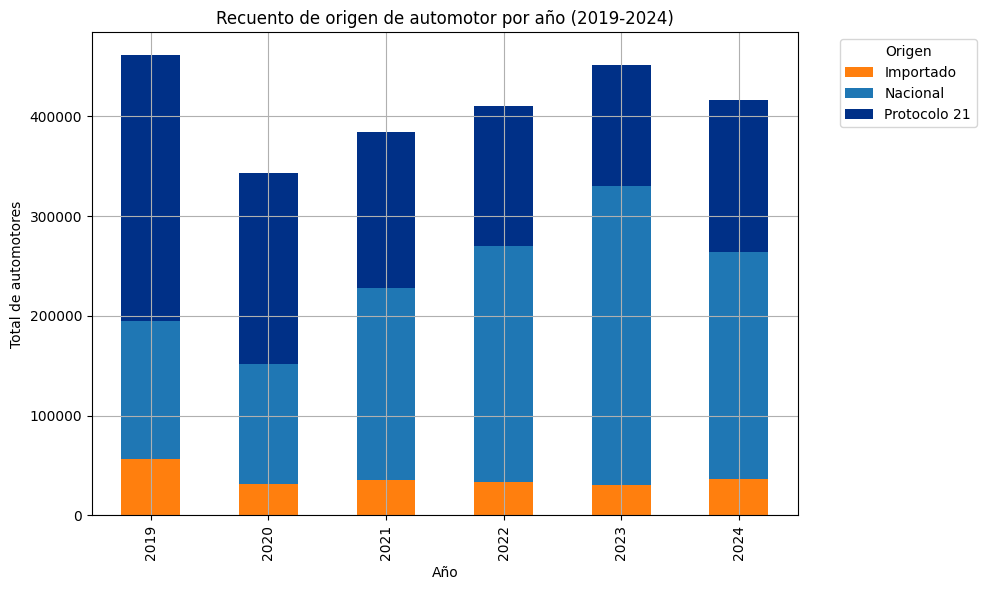

In [7]:
# --- Recuento de origen de automotor por año ---
# Agrupar por año y origen
recuento_origen_por_año = df.groupby(['Año', 'automotor_origen']).size().unstack(fill_value=0)

# Mostrar tabla de recuento por origen y año
print("\nRecuento de automotores por origen y año:")
print(recuento_origen_por_año)

# Calcular el total por año según este desglose
total_por_año_origen = recuento_origen_por_año.sum(axis=1)
print("\nTotal de automotores por año (desglosado por origen):")
print(total_por_año_origen)

# Definir colores personalizados para cada categoría
colores_origen = {
    'Importado': '#ff7f0e',    # Naranja
    'Nacional': '#1f77b4',     # Azul claro
    'Protocolo 21': '#003087'  # Azul oscuro
}

# Crear una lista de colores en el orden de las columnas
colores = [colores_origen[col] for col in recuento_origen_por_año.columns]

# Gráfico de barras apiladas con colores personalizados
plt.figure(figsize=(10, 6))
recuento_origen_por_año.plot(kind='bar', stacked=True, color=colores, figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Total de automotores')
plt.title('Recuento de origen de automotor por año (2019-2024)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Origen')
plt.grid(True)
plt.tight_layout()
plt.show()